# Imports

In [1]:
import numpy as np
import matplotlib.image as mpimg

In [2]:
import scipy as sci

In [3]:
import matplotlib.pyplot as plt

In [4]:
from os import listdir
from os.path import isfile , join

In [5]:
from scipy import misc
from scipy import signal

In [6]:
import cv2

# Scaling & normalizing

In [7]:
def map_img(img):
    imgRange = img.max() - img.min()
    imgMapped = np.subtract(img, img.min())*255/imgRange
    return imgMapped

In [8]:
def normalize_img(mode, img):
    if (mode == "01"):
        normalizedImg = np.subtract(img, img.min())/(img.max()-img.min())
    elif (mode == "std"):
        normalizedImg = np.subtract(img, img.mean())/(img.std())
    #elif (mode == "allImg"):
     #   normalizedImg = np.subtract(img, img.mean())/(img.std())
    return normalizedImg    

# Read images

In [9]:
def gray_scale(img):
    r = img[:,:,0] * 0.2989 
    g = img[:,:,1] * 0.5870 
    b = img[:,:,2] * 0.1140
#     r = img[:,:,0] / 3
#     g = img[:,:,1] / 3
#     b = img[:,:,2] / 3
    return np.add(r, g, b)

In [10]:
images_files = [ join("./images" , f) for f in listdir("images") if isfile(join("images" , f)) ]
#print(images_files)
#print(listdir("images"))
rgbImages = [ mpimg.imread( f ) for f in images_files ]
# rgbImages = [cv2.cvtColor(f, cv2.COLOR_BGR2RGB) for f in bgrImages ]

* Scipy refused to read image so used opencv
* opencv reads images in BGR

In [11]:
print(len(rgbImages))

6


In [12]:
grayImg = [ gray_scale(img) for img in rgbImages ]

In [13]:
# show_images(grayImg)

In [14]:
np.arange(8.0).reshape((2, 2, 2))[0][1]

array([2., 3.])

In [15]:
np.arange(3.0)

array([0., 1., 2.])

# Display Images

In [16]:
def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure(figsize=(80,100))
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i],cmap=plt.get_cmap('gray'))

    plt.show(block=True)

In [17]:
def show_images_fast(images):
    fig = plt.figure(figsize=(20, 8))
    for i in range(0, len(images)):
        ax = fig.add_subplot(2, 3, i + 1)
        plt.axis("off")
        plt.imshow(images[i], cmap=plt.get_cmap('gray'))


In [18]:
grayImg[0].shape

(393, 450)

# Noise

## Uniform

0


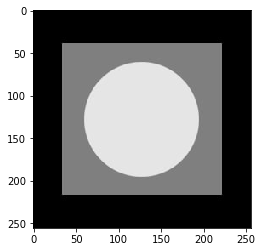

In [19]:
noiseCheck = cv2.imread("noiseCheck.jpg")
plt.imshow(noiseCheck)
print(noiseCheck.min())

In [20]:
def uniform_noise(img):
    noise = np.random.uniform(low = -128, high = 128, size = img.shape)
#     noise = map_img(noise)
    imgNoisy = np.add(img, noise)
    imgNoisyMapped = map_img(imgNoisy)
    return imgNoisyMapped

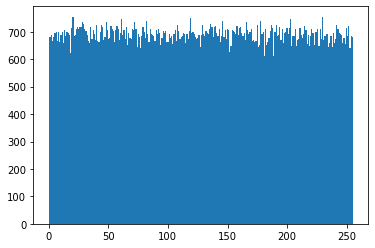

In [21]:
noise = np.random.uniform(low = -127.5, high = 127.5, size = grayImg[0].shape)
plt.hist(map_img(noise).ravel(),256,[0,255]); plt.show()

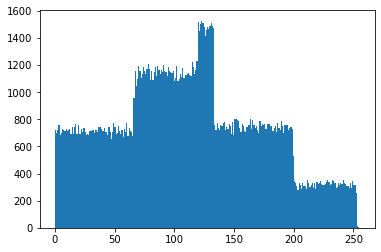

In [22]:
plt.hist(uniform_noise(noiseCheck).ravel(),256 ,range=(0, 255)); plt.show()

In [23]:
np.random.random(9)/255 

array([1.67399710e-03, 1.10208506e-03, 9.15728207e-04, 1.42835396e-05,
       2.47487500e-03, 2.94095773e-03, 3.81420753e-03, 2.26606825e-03,
       3.77668120e-03])

## Gaussian Noise

In [24]:
def gaussian_noise(img, mu = 0.0, std = 1.0):
    size = img.shape
    noise = np.random.normal(loc = mu, scale = std, size = img.shape)
    noise = map_img(noise)
    imgNoisy = np.add(img, noise)
    imgNoisyMapped = map_img(imgNoisy)
    return imgNoisyMapped

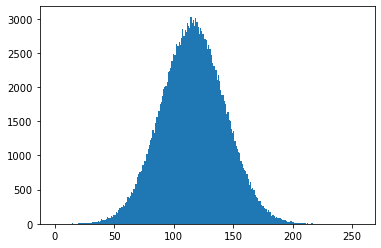

In [25]:
noise = np.random.normal(loc = 0, scale = 1, size = noiseCheck.shape)
noise = map_img(noise)
plt.hist(noise.ravel(),256,[0,256]); plt.show()

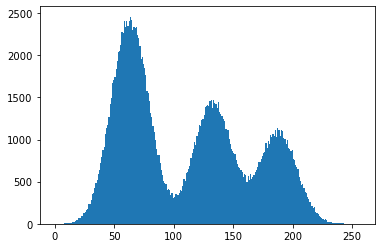

In [26]:
plt.hist(gaussian_noise(noiseCheck).ravel(),256,[0,256]); plt.show()

## Salt & pepper

In [27]:
def salt_n_pepper(img, saltPercent, origPercent):
    pepperPercent = 100-saltPercent-origPercent
    percentilesIndx = np.random.rand(img.shape[0], img.shape[1]) #values between 0 and 1
    saltIndx = np.where(percentilesIndx < saltPercent/100)
    pepperIndx = np.where(percentilesIndx < pepperPercent/100)
    imgNoisy = img
    imgNoisy[saltIndx] = 255
    imgNoisy[pepperIndx] = 0
    return imgNoisy

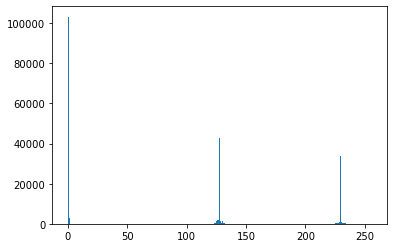

In [28]:
plt.hist(salt_n_pepper(noiseCheck,10,80).ravel(),256,[0,256]); plt.show()

# LPF

## Average

In [29]:
def average_filter(img, kernelSize = 3):
    fltr = np.ones((kernelSize,kernelSize), dtype=int) * 1/(kernelSize * kernelSize)
    cleanImg = signal.convolve2d(img, fltr, mode = "same") #o/p same size as img, default padding zero
    return cleanImg

## Gaussian

In [30]:
def gaussian_filter(img, sigma = 1.0, kernelSize = 3):
    M = kernelSize*kernelSize
    fltrWindow = np.asmatrix(signal.gaussian(M, std = sigma, sym=True))
    fltrT = np.transpose(fltrWindow)
    kernel = np.matmul(fltT,fltrWindow)
    kernelNormalized = kernel/np.sum(kernel)
    cleanImg = signal.convolve2d(img, kernelNormalized, mode = "same") #o/p same size as img, default padding zero
    return cleanImg
# def gaussian_filter(img, kernelSize = 3):
#     if (kernelSize == 3):
#         fltr = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
#     elif (kernelSize == 5):
#         fltr = np.array([[1, 4, 7, 4, 1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7], [4, 16, 26, 16, 4], [1, 4, 7, 4, 1]])/273
#     cleanImg = signal.convolve2d(img, fltr, mode = "same") #o/p same size as img, default padding zero
#     return cleanImg

[[0.60653066 1.         0.60653066]]
(1, 3)
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


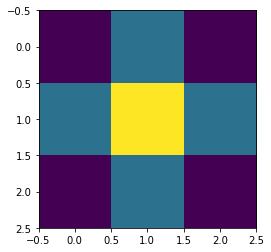

In [31]:
fltrWindow = np.asmatrix(signal.gaussian(3, std = 1.0, sym=True))
print(fltrWindow)
fltT = np.transpose(fltrWindow)
print(fltrWindow.shape)
flt = np.matmul(fltT,fltrWindow)
flt = flt/np.sum(flt)
print(flt)
plt.imshow(flt)

## Median

In [32]:
# def median_filter(img, kernelSize = 3): 
#     fltr = [0]*kernelSize*kernelSize
#     cleanImg = np.zeros(img.shape, dtype = int)
#     for i in range(1,img.shape[0]-1): #no padding ignore 1st and last row and column
#         for j in range(1,img.shape[1]-1):
#             fltr[0] = img[i-1][j-1]
#             fltr[1] = img[i-1][j]
#             fltr[2] = img[i-1][j+1]
#             fltr[3] = img[i][j-1]
#             fltr[4] = img[i][j]
#             fltr[5] = img[i][j+1]
#             fltr[6] = img[i+1][j-1]
#             fltr[7] = img[i+1][j]
#             fltr[8] = img[i+1][j+1]
#             fltr.sort()
#             cleanImg[i][j] = fltr[4]//1
#     return cleanImg

In [33]:
def median_filter(img, kernelSize = 3): 
    fltr = [0]*kernelSize*kernelSize
    cleanImg = np.zeros(img.shape, dtype = int)
    imgRow = img.shape[0]
    imgCol = img.shape[1]
    boundary = (kernelSize // 2)
    for x in range (boundary, imgRow-boundary):
        for y in range (boundary, imgCol-boundary):
            i = 0
            for fltrx in range(0, kernelSize): 
                for fltry in range (0, kernelSize):
                    fltr[i] = img[x + fltrx - boundary][y + fltry - boundary]
                    i = i + 1
            fltr.sort()
            cleanImg[x][y] = fltr[kernelSize * kernelSize // 2]
    return cleanImg

In [34]:
fltr = [0] * 9
fltr[0] = 3
fltr[1] = 9
fltr[2] = 1
fltr[3] = 7
fltr[4] = 6
fltr[5] = 8
fltr[6] = 5
fltr[7] = 2
fltr[8] = 4
fltr.sort()
fltr
len(fltr)

9

In [35]:
kernelSize = 3
np.ones((kernelSize,kernelSize), dtype=int) * 1/(kernelSize * kernelSize)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

# Edge Detection

(480, 640)
(480, 640)
255


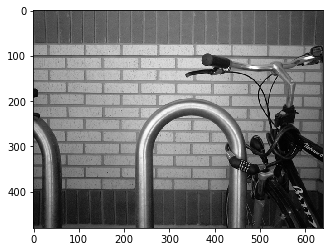

In [36]:
edgeCheck = mpimg.imread("edgeCheck.jpg")
print(edgeCheck.shape)
plt.imshow(edgeCheck,cmap='gray')
print(edgeCheck.shape)
print(edgeCheck.max())

In [37]:
def binarize( gray_image , threshold ):
    threshold = np.max( gray_image ) * threshold
    return 1 * ( gray_image > threshold )

## Sobel

In [38]:
from scipy import ndimage

In [39]:
def sobel_edge(img, threshold = 0, mode = 'gray'):
    kernely = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    kernelx = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    grady = signal.convolve2d(img, kernely, mode = "same") #o/p same size as img, default padding zero
    gradx = signal.convolve2d(img, kernelx, mode = "same")
#     edgeMagnitude = abs(gradx) + abs(grady)
    edgeMagnitude = np.sqrt(np.square(gradx) + np.square(grady))
#     edgeMagnitude = np.hypot(gradx, grady)
    edgeDirection = np.arctan2(grady, gradx)
#     print(edgeMagnitude.max())
#     print(edgeMagnitude.min())
    edgeMagnitude *= 255.0/ edgeMagnitude.max()
#     edgeMagnitude = map_img(edgeMagnitude) #scale mag from 0 to 255
#     edgeMagnitude = np.round(edgeMagnitude)
#     threshold = 70 #[0 255]
    if(mode == 'binary'and threshold != 0):
        edgeMagnitude[edgeMagnitude > threshold] = 255
        edgeMagnitude[edgeMagnitude <= threshold] = threshold #or zero
    return edgeMagnitude, edgeDirection

254.99998


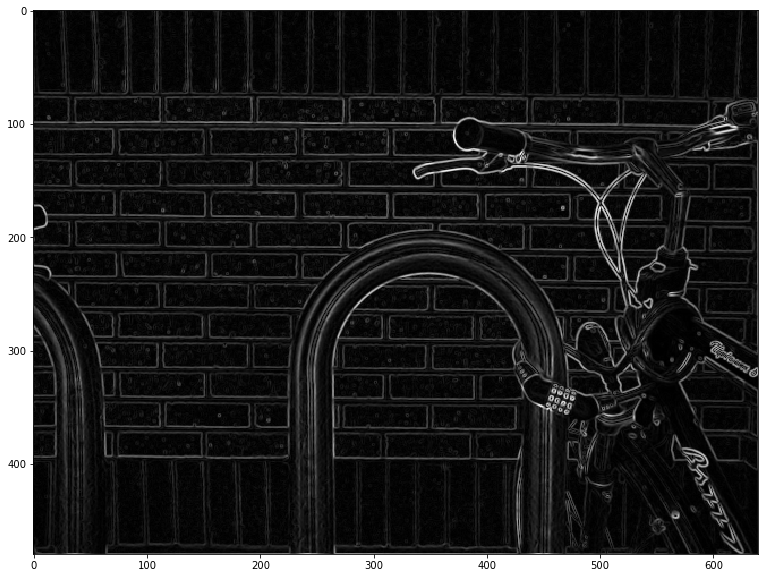

In [40]:
c,theta = sobel_edge(edgeCheck)
print(c.max())
plt.figure(figsize=(20,10))
plt.imshow(c, cmap='gray')

## Roberts

In [41]:
def roberts_edge(img, threshold = 0, mode = 'gray'):
    kernely = np.array([[1, 0], [0, -1]], np.float32)
    kernelx = np.array([[0, 1], [-1, 0]], np.float32)
    grady = signal.convolve2d(img, kernely, mode = "same") #o/p same size as img, default padding zero
    gradx = signal.convolve2d(img, kernelx, mode = "same")
#     edgeMagnitude = abs(gradx) + abs(grady)
    edgeMagnitude = np.sqrt(np.square(gradx) + np.square(grady))
    edgeDirection = np.arctan2(grady, gradx)
#     print(edgeMagnitude.max())
#     print(edgeMagnitude.min())
#     edgeMagnitude *= 255/ edgeMagnitude.max()
    edgeMagnitude = map_img(edgeMagnitude)
#     edgeMagnitude = np.round(edgeMagnitude)
#     threshold = 70 #[0 255]
    if(mode == 'binary'and threshold != 0):
        edgeMagnitude[edgeMagnitude > threshold] = 255
        edgeMagnitude[edgeMagnitude <= threshold] = 0
    return edgeMagnitude, edgeDirection

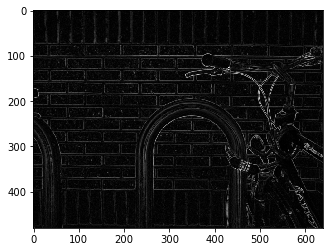

In [42]:
c, theta = roberts_edge(edgeCheck)
plt.imshow(c, cmap='gray')

## Prewitt

In [43]:
def prewitt_edge(img, threshold = 0, mode = 'gray'):
    kernely = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], np.float32)
    kernelx = np.transpose(kernely)
    grady = signal.convolve2d(img, kernely, mode = "same") #o/p same size as img, default padding zero
    gradx = signal.convolve2d(img, kernelx, mode = "same")
#     edgeMagnitude = abs(gradx) + abs(grady)
    edgeMagnitude = np.sqrt(np.square(gradx) + np.square(grady))
    edgeDirection = np.arctan2(grady, gradx)
#     print(edgeMagnitude.max())
#     print(edgeMagnitude.min())
#     edgeMagnitude *= 255/ edgeMagnitude.max()
    edgeMagnitude = map_img(edgeMagnitude) #scale mag from 0 to 255
#     edgeMagnitude = np.round(edgeMagnitude)
#     threshold = 70 #[0 255]
    if(mode == 'binary'and threshold != 0):
        edgeMagnitude[edgeMagnitude <= threshold] = 0
        edgeMagnitude[edgeMagnitude > threshold] = 255
    return edgeMagnitude, edgeDirection

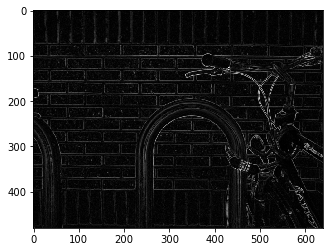

In [44]:
c,theta = roberts_edge(edgeCheck)
plt.imshow(c, cmap='gray')

## Canny

(512, 512, 3)
(512, 512)
220.59991


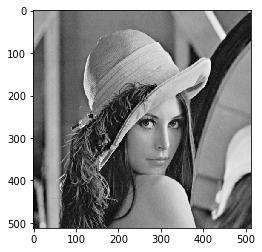

In [45]:
cannyCheck = mpimg.imread("cannyCheck.png")
print(cannyCheck.shape)
cannyCheck = gray_scale(cannyCheck)*255.0
plt.imshow(cannyCheck,cmap='gray')
print(cannyCheck.shape)
print(cannyCheck.max())
# plt.hist(cannyCheck.ravel(),256,[0,256]); plt.show()

In [46]:
def non_max_suppression(magnitude, direction):
    row, col = magnitude.shape
    suppressed = np.zeros((row,col))
    angle = np.rad2deg(direction)
    angle += 180

    for i in range(1,row-1):
        for j in range(1,col-1):
            try:
                beforePixel = 255
                afterPixel = 255
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (337.5 <= angle[i,j] <= 360):
                    afterPixel = magnitude[i, j+1]
                    beforePixel = magnitude[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5) or (202.5 <= angle[i][j] < 247.5):
                    afterPixel = magnitude[i+1, j-1]
                    beforePixel = magnitude[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i][j] < 112.5) or (247.5 <= angle[i][j] < 292.5):
                    afterPixel = magnitude[i+1, j]
                    beforePixel = magnitude[i-1, j]
                #angle 135
                else:
                    afterPixel = magnitude[i-1, j-1]
                    beforePixel = magnitude[i+1, j+1]

                if (magnitude[i,j] >= beforePixel) and (magnitude[i,j] >= afterPixel):
                    suppressed[i,j] = magnitude[i,j]

            except IndexError as e:
                pass
    
    return suppressed

In [47]:
def double_threshold(img, low, high, weak):
    
    row, col = img.shape
    thresholded = np.zeros((row,col))
    
    strong = 255
    
    strong_i, strong_j = np.where(img >= high)
#     zeros_i, zeros_j = np.where(img < low)
    
    weak_i, weak_j = np.where((img <= high) & (img >= low))
    
    thresholded[strong_i, strong_j] = strong
    thresholded[weak_i, weak_j] = weak
    
    return (thresholded, weak, strong)

In [48]:
def hysteresis(img, weak, strong=255):
    row, col = img.shape
    image_row, image_col= img.shape
    top = img.copy()
    for i in range(1, row-1):
        for j in range(1, col-1):
            if (top[i,j] == weak):
                try:
                    if ((top[i+1, j-1] == strong) or (top[i+1, j] == strong) or (top[i+1, j+1] == strong)
                        or (top[i, j-1] == strong) or (top[i, j+1] == strong)
                        or (top[i-1, j-1] == strong) or (top[i-1, j] == strong) or (top[i-1, j+1] == strong)):
                        top[i, j] = strong
                    else:
                        top[i, j] = 0
                except IndexError as e:
                    pass
#     bottom = img.copy()
#     for row in range(image_row - 1, 0, -1):
#         for col in range(image_col - 1, 0, -1):
#             if bottom[row, col] == weak:
#                 if bottom[row, col + 1] == 255 or bottom[row, col - 1] == 255 or bottom[row - 1, col] == 255 or bottom[
#                     row + 1, col] == 255 or bottom[
#                     row - 1, col - 1] == 255 or bottom[row + 1, col - 1] == 255 or bottom[row - 1, col + 1] == 255 or bottom[
#                     row + 1, col + 1] == 255:
#                     bottom[row, col] = 255
#                 else:
#                     bottom[row, col] = 0
                    
#     right_to_left = img.copy()
 
#     for row in range(1, image_row):
#         for col in range(image_col - 1, 0, -1):
#             if right_to_left[row, col] == weak:
#                 if right_to_left[row, col + 1] == 255 or right_to_left[row, col - 1] == 255 or right_to_left[row - 1, col] == 255 or right_to_left[
#                     row + 1, col] == 255 or right_to_left[
#                     row - 1, col - 1] == 255 or right_to_left[row + 1, col - 1] == 255 or right_to_left[row - 1, col + 1] == 255 or right_to_left[
#                     row + 1, col + 1] == 255:
#                     right_to_left[row, col] = 255
#                 else:
#                     right_to_left[row, col] = 0

#     left_to_right = img.copy()

#     for row in range(image_row - 1, 0, -1):
#         for col in range(1, image_col):
#             if left_to_right[row, col] == weak:
#                 if left_to_right[row, col + 1] == 255 or left_to_right[row, col - 1] == 255 or left_to_right[row - 1, col] == 255 or left_to_right[
#                     row + 1, col] == 255 or left_to_right[
#                     row - 1, col - 1] == 255 or left_to_right[row + 1, col - 1] == 255 or left_to_right[row - 1, col + 1] == 255 or left_to_right[
#                     row + 1, col + 1] == 255:
#                     left_to_right[row, col] = 255
#                 else:
#                     left_to_right[row, col] = 0
#     final_image = top + bottom + right_to_left + left_to_right
 
#     final_image[final_image > 255] = 255
    final_image = top
    return final_image

In [49]:
def canny_edge(img, sigma = 0.1, gaussSize = 3, filter = sobel_edge, minThresh = 5, maxThresh = 20, weak = 50):
    smoothed_img = gaussian_filter(img, sigma, gaussSize)
    grad, theta = filter(smoothed_img)
    
    suppressed = non_max_suppression(grad, theta)
    thresholded, weak, strong = double_threshold(suppressed, minThresh, maxThresh, weak)
    hyster = hysteresis(thresholded, weak)
    
    fig = plt.figure(figsize=(10, 20))
    print(suppressed.max())
#     plt.hist(thresholded.ravel(),256,[1.0,101.0]); plt.show()
#     ax = fig.add_subplot(2, 3, 1)
#     plt.axis("off")
#     plt.imshow(suppressed*3.0, cmap='gray')
    
#     ax = fig.add_subplot(2, 3, 2)
#     plt.axis("off")
#     plt.imshow(thresholded, cmap='gray')
    
#     ax = fig.add_subplot(2, 3, 3)

#     plt.imshow(hyster, cmap=plt.get_cmap('gray'))
    return hyster
    
    
            
    
    
    

149.35987828283737


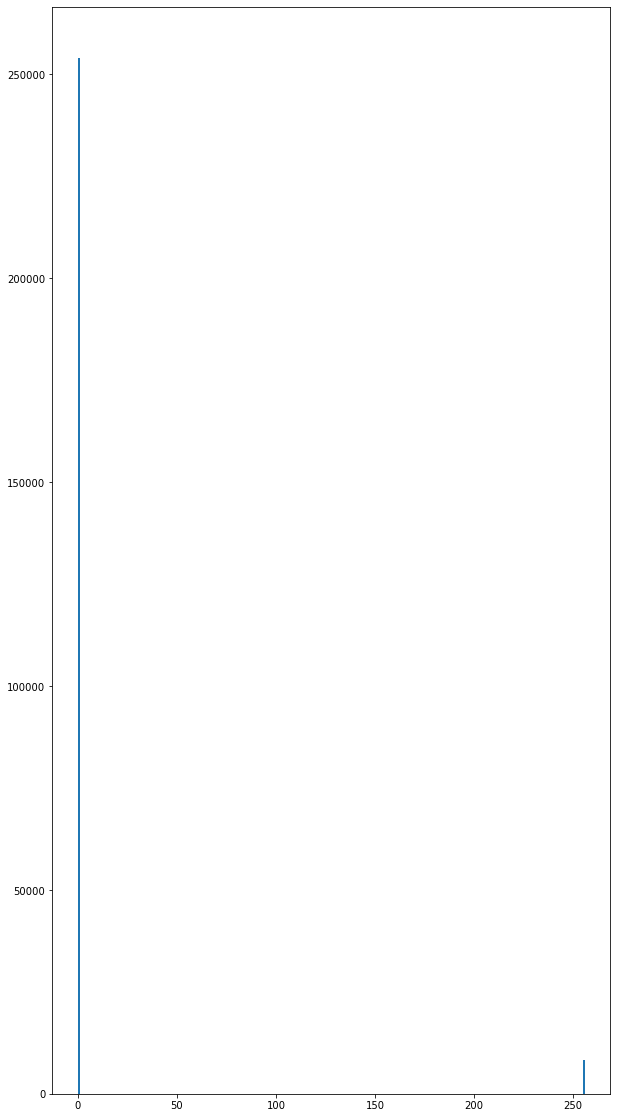

In [65]:
import numpy as np
# np.set_printoptions(threshold=np.inf)
# np.set_printoptions(threshold=1000)
c = canny_edge(cannyCheck, 1.0, 9, minThresh = 10, maxThresh = 35, weak = 50)
plt.hist(c.ravel(),256,[0,256]); plt.show()

149.35987828283737


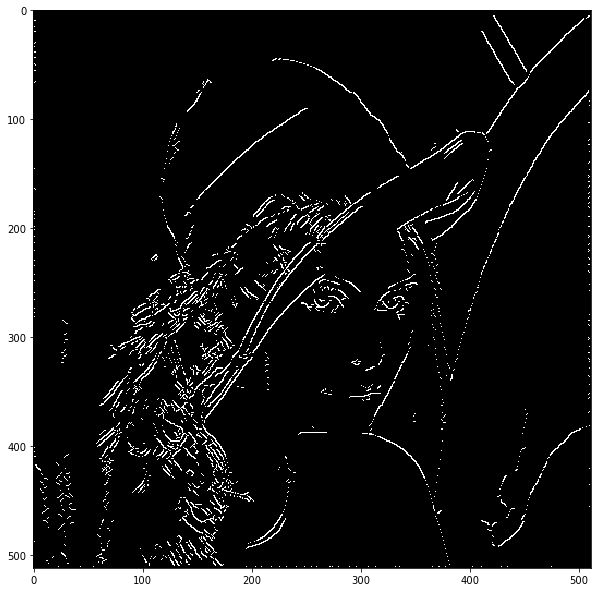

In [51]:
plt.imshow(canny_edge(cannyCheck, 1.0, 9, minThresh = 10, maxThresh = 35, weak = 50), cmap='gray')

# Main

## Adding Noise

In [52]:
uniformNoisyImg = [ uniform_noise(map_img(img)) for img in grayImg ]

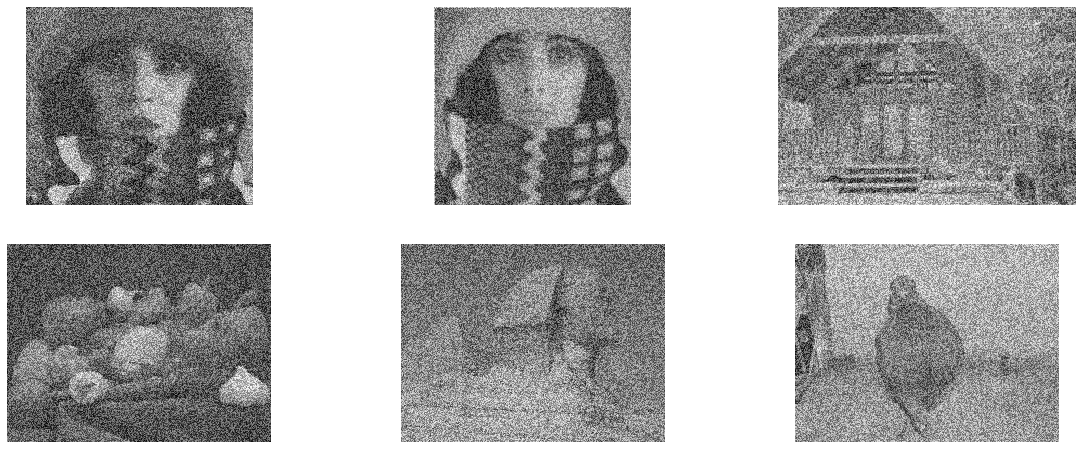

In [53]:
show_images_fast(uniformNoisyImg)

In [54]:
gaussianNoisyImg = [ gaussian_noise(img, mu = 0.0, std = 0.3) for img in grayImg ]

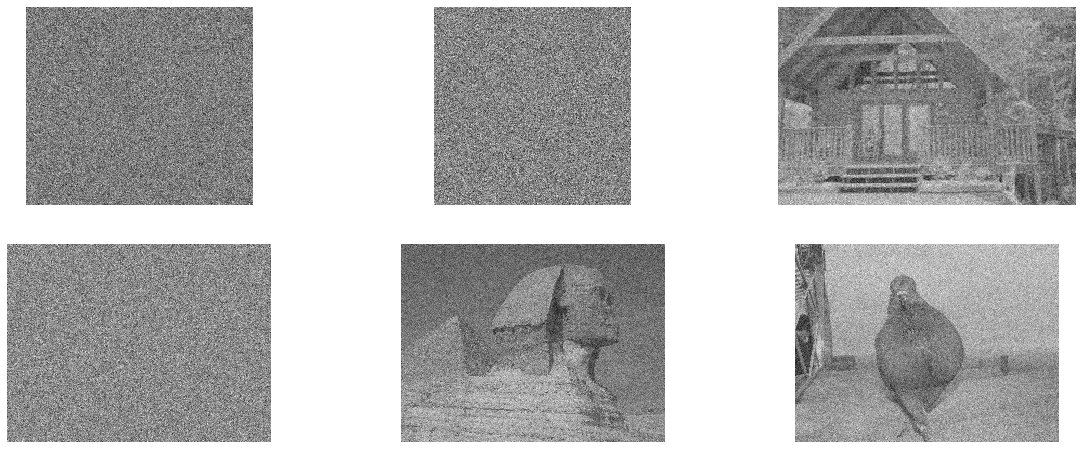

In [55]:
show_images_fast(gaussianNoisyImg)

In [56]:
speckleNoisyImg = [ salt_n_pepper(img, saltPercent = 10, origPercent = 80) for img in grayImg ]

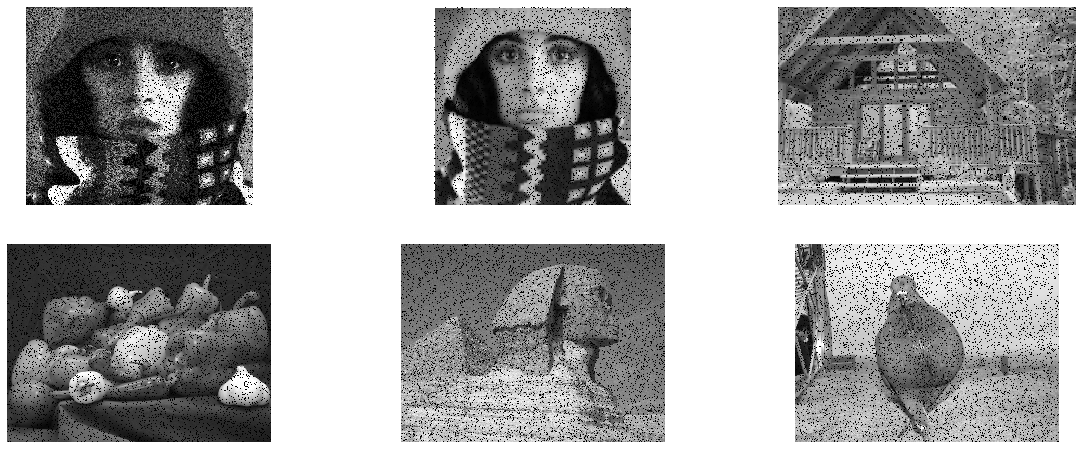

In [57]:
show_images_fast(speckleNoisyImg)

In [58]:
speckleNoisyImg[0].shape

(393, 450)

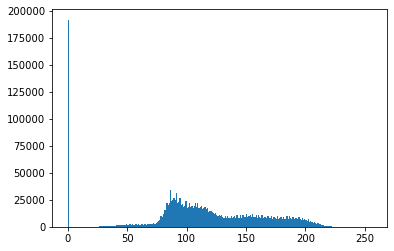

In [59]:
plt.hist(speckleNoisyImg[4].ravel(),256,[0,256]); plt.show()

## Filtering noise

### Filter Speckle noise

In [60]:
averageFilterSpeckle = [ average_filter(img) for img in speckleNoisyImg ]
gaussianFilterSpeckle = [ gaussian_filter(img) for img in speckleNoisyImg]

In [61]:
medianFilterSpeckle = [ median_filter(img, 5) for img in speckleNoisyImg ]

KeyboardInterrupt: 

#### Display

In [ ]:
show_images_fast(averageFilterSpeckle)

In [ ]:
show_images_fast(medianFilterSpeckle)

In [ ]:
show_images_fast(gaussianFilterSpeckle)

### Filter Uniform noise

In [ ]:
averageFilterUniform = [ average_filter(img) for img in uniformNoisyImg ]
medianFilterUnifrom = [ median_filter(img) for img in uniformNoisyImg ]
gaussianFilterUniform = [ gaussian_filter(img) for img in uniformNoisyImg ]

#### Display

In [ ]:
show_images_fast(averageFilterUniform)

In [ ]:
show_images_fast(medianFilterUnifrom)

In [ ]:
show_images_fast(gaussianFilterUniform)

### Filter Gaussian noise

In [ ]:
averageFilterGaussian = [ average_filter(img) for img in gaussianNoisyImg]
medianFilterGaussian = [ median_filter(img) for img in gaussianNoisyImg ]
gaussianFilterGaussian = [ gaussian_filter(img) for img in gaussianNoisyImg ]

#### Display

In [ ]:
show_images_fast(averageFilterGaussian)

In [ ]:
show_images_fast(medianFilterGaussian)

In [ ]:
show_images_fast(gaussianFilterGaussian)

## Detect Edges